## What is Tensorflow?

> TensorFlow™ is an open source software library for __numerical computation using data flow graphs__. __Nodes__ in the graph __represent mathematical operations__, while the __graph edges represent the multidimensional data arrays (tensors)__ communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. - [tensorflow.com](tensorflow.com)

![Computation graph of a linear classifier](figs/tf-graph.png) Image by [Josh Meyer](http://jrmeyer.github.io/tutorial/2016/02/01/TensorFlow-Tutorial.html)

---

Tensorflow contains a range of high-level and low-level APIs that allows scalable multi-device computation, like MapReduce. It has several APIs, such as:

1. Core Tensorflow (tf)
    > Low-level access to creating your own computation nodes and graphs. 
2. Neural Network (tf.nn)
    > For creating neural networks on the graph-level.
3. Bayesflow (tf.contrib.bayesflow)
    > Bayesian inference and modeling in Tensorflow
4. TFLearn (tf.contrib.learn)
    > High-level APIs for popular machine learning models, such as Logistic Regression, SVM, k-means, etc.
5. Keras (tf.contrib.keras)
    > High-level API for creating deep neural networks

## What is Keras?

> Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. 
Use Keras if you need a deep learning library that:
* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.

For this session, we'll be using Keras, powered by Tensorflow, to create our own deep neural networks for classification problems.

In [1]:
%pylab inline
import tensorflow as tf
sess = tf.Session()

from keras import backend as K_
K_.set_session(sess)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


### Revisiting the Spiral Classification Problem
__Objective:__ Classify groups of data points that behave in a spiral manner.

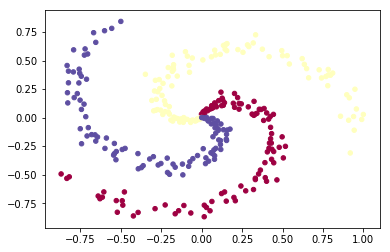

In [2]:
# Let's generate a dataset

N = 100 # points per class
D = 2 # dimensionality at 2 so we can visualize it
K = 3 # number of classes

# X will contain the features / predictors
# y will contain the labels or "answers"
X = np.zeros((N*K, D)) # generate an empty matrix to hold X features
y = np.zeros(N*K, dtype='uint8') # generate an empty vector to hold y labels

# for 3 classes, evenly generates spiral arms
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()

### Revisiting our single hidden layer neural network

With Keras, we can just specify how our neural network looks like, layer-wise.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(100, input_shape=(D,)), # This is a layer with 100 neurons, which accepts D inputs
    Activation('relu'), # we specify ReLU as our activation function
    Dense(K), # This is the output layer with K neurons, representing the number of classes we have
    Activation('softmax'), # The final activation function, softmax
])

Then we specify the optimizer, cost function, and the metrics we'll see when we train our neural network.  

In [4]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

To finally train our model, we just invoke model.fit() with our data, the number of iterations, and the number of instances that will be sampled from our dataset.

In [5]:
model.fit(X, y, nb_epoch=300, batch_size=32)

Epoch 1/300
300/300 [==============================] - 0s - loss: 1.0877 - acc: 0.3967     
Epoch 2/300
300/300 [==============================] - 0s - loss: 1.0430 - acc: 0.5300     
Epoch 3/300
300/300 [==============================] - 0s - loss: 1.0114 - acc: 0.5400     
Epoch 4/300
300/300 [==============================] - 0s - loss: 0.9836 - acc: 0.5600     
Epoch 5/300
300/300 [==============================] - 0s - loss: 0.9572 - acc: 0.5567     
Epoch 6/300
300/300 [==============================] - 0s - loss: 0.9340 - acc: 0.5567     
Epoch 7/300
300/300 [==============================] - 0s - loss: 0.9111 - acc: 0.5533     
Epoch 8/300
300/300 [==============================] - 0s - loss: 0.8889 - acc: 0.5600     
Epoch 9/300
300/300 [==============================] - 0s - loss: 0.8673 - acc: 0.5567     
Epoch 10/300
300/300 [==============================] - 0s - loss: 0.8476 - acc: 0.5333     
Epoch 11/300
300/300 [==============================] - 0s - loss: 0.8301 - acc

300/300 [==============================] - 0s - loss: 0.4191 - acc: 0.8333     
Epoch 90/300
300/300 [==============================] - 0s - loss: 0.4147 - acc: 0.8367     
Epoch 91/300
300/300 [==============================] - 0s - loss: 0.4110 - acc: 0.8500     
Epoch 92/300
300/300 [==============================] - 0s - loss: 0.4072 - acc: 0.8333     
Epoch 93/300
300/300 [==============================] - 0s - loss: 0.4026 - acc: 0.8533     
Epoch 94/300
300/300 [==============================] - 0s - loss: 0.3992 - acc: 0.8533     
Epoch 95/300
300/300 [==============================] - 0s - loss: 0.3950 - acc: 0.8700     
Epoch 96/300
300/300 [==============================] - 0s - loss: 0.3910 - acc: 0.8633     
Epoch 97/300
300/300 [==============================] - 0s - loss: 0.3872 - acc: 0.8567     
Epoch 98/300
300/300 [==============================] - 0s - loss: 0.3832 - acc: 0.8767     
Epoch 99/300
300/300 [==============================] - 0s - loss: 0.3798 - acc: 0.

300/300 [==============================] - 0s - loss: 0.1769 - acc: 0.9600     
Epoch 177/300
300/300 [==============================] - 0s - loss: 0.1754 - acc: 0.9667     
Epoch 178/300
300/300 [==============================] - 0s - loss: 0.1740 - acc: 0.9667     
Epoch 179/300
300/300 [==============================] - 0s - loss: 0.1729 - acc: 0.9633     
Epoch 180/300
300/300 [==============================] - 0s - loss: 0.1710 - acc: 0.9733     
Epoch 181/300
300/300 [==============================] - 0s - loss: 0.1697 - acc: 0.9667     
Epoch 182/300
300/300 [==============================] - 0s - loss: 0.1683 - acc: 0.9700     
Epoch 183/300
300/300 [==============================] - 0s - loss: 0.1663 - acc: 0.9667     
Epoch 184/300
300/300 [==============================] - 0s - loss: 0.1651 - acc: 0.9733     
Epoch 185/300
300/300 [==============================] - 0s - loss: 0.1638 - acc: 0.9700     
Epoch 186/300
300/300 [==============================] - 0s - loss: 0.1625

300/300 [==============================] - 0s - loss: 0.0885 - acc: 0.9867     
Epoch 264/300
300/300 [==============================] - 0s - loss: 0.0884 - acc: 0.9867     
Epoch 265/300
300/300 [==============================] - 0s - loss: 0.0871 - acc: 0.9867     
Epoch 266/300
300/300 [==============================] - 0s - loss: 0.0866 - acc: 0.9900     
Epoch 267/300
300/300 [==============================] - 0s - loss: 0.0859 - acc: 0.9867     
Epoch 268/300
300/300 [==============================] - 0s - loss: 0.0857 - acc: 0.9900     
Epoch 269/300
300/300 [==============================] - 0s - loss: 0.0849 - acc: 0.9867     
Epoch 270/300
300/300 [==============================] - 0s - loss: 0.0842 - acc: 0.9867     
Epoch 271/300
300/300 [==============================] - 0s - loss: 0.0845 - acc: 0.9867     
Epoch 272/300
300/300 [==============================] - 0s - loss: 0.0829 - acc: 0.9867     
Epoch 273/300
300/300 [==============================] - 0s - loss: 0.0829

### I saw that you used a different optimizer this time. What's up with that?

Sessions before, we've talked about gradient descent as our optimizer for finding the global minimum in our cost function. 

However, using plain gradient descent doesn't usually give you good results.

Thus, there are now a bunch of new gradient descent-based optimization algorithms such as:

1. Stochastic Gradient Descent
2. Adagrad
3. Adadelta
4. Adam

and a whole lot more! In fact, new optimization algorithms for training neural networks are still a very active area of research.

Here's a visualization by Alec Radford:

![optimizers](figs/optimizers.gif)

### So what do I choose?
There's a need for experimentation, still, since the behavior of the optimization algorithms depends on the structure of your data. Just a rule of thumb, RMSProp is usually good enough.

To make our model predict new data points, just call model.predict()

In [6]:
model.predict(np.array([[2, 1]]))

array([[  1.73754540e-18,   1.00000000e+00,   0.00000000e+00]], dtype=float32)

In [7]:
np.argmax(model.predict(np.array([[2, 1]])))

1

In [8]:
predicted_class = np.argmax(model.predict(X), axis=1)

(-1.868550254477845, 1.8314497455221583)

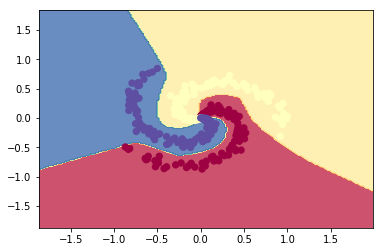

In [9]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Digit recognition with the MNIST Dataset

What is the MNIST Dataset?

> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples... The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. - [MNIST](http://yann.lecun.com/exdb/mnist/)

Let's download and access the MNIST dataset with Keras

In [10]:
from keras.datasets import mnist

In [11]:
# the data, shuffled and split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data()

In [12]:
# Let's format the dataset that we got
x_train = x_train_valid.reshape(60000, 784)[:55000]
x_valid = x_train_valid.reshape(60000, 784)[55000:]
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
targets = y_train_valid.reshape(-1)
y_train_valid = np.eye(10)[targets]
y_train = np.eye(10)[targets][:55000]
y_valid = np.eye(10)[targets][55000:]

targets = y_test.reshape(-1)
y_test = np.eye(10)[targets]

55000 train samples
5000 validation samples
10000 test samples


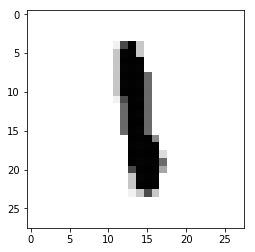

In [13]:
imshow(x_train[200].reshape(28,28), cmap='Greys')

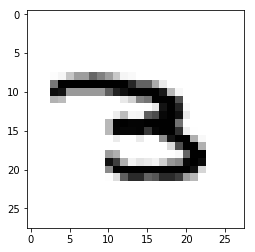

In [14]:
imshow(x_train[250].reshape(28,28), cmap='Greys')

### Let's see how a linear classifier performs with MNIST

In [15]:
model = Sequential([
    Dense(100, input_shape=(784,)), # This is a layer with 100 neurons, which accepts 784 inputs
    Activation('relu'), # we specify ReLU as our activation function
    Dense(10), # This is the output layer with K neurons, representing the number of classes we have
    Activation('softmax'), # The final activation function, softmax
])

In [16]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [17]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 1s - loss: 0.4030 - categorical_accuracy: 0.8894 - val_loss: 0.1806 - val_categorical_accuracy: 0.9514
Epoch 2/20
55000/55000 [==============================] - 1s - loss: 0.1858 - categorical_accuracy: 0.9472 - val_loss: 0.1270 - val_categorical_accuracy: 0.9672
Epoch 3/20
55000/55000 [==============================] - 1s - loss: 0.1382 - categorical_accuracy: 0.9601 - val_loss: 0.1035 - val_categorical_accuracy: 0.9730
Epoch 4/20
55000/55000 [==============================] - 1s - loss: 0.1087 - categorical_accuracy: 0.9688 - val_loss: 0.0940 - val_categorical_accuracy: 0.9722
Epoch 5/20
55000/55000 [==============================] - 1s - loss: 0.0891 - categorical_accuracy: 0.9733 - val_loss: 0.0855 - val_categorical_accuracy: 0.9750
Epoch 6/20
55000/55000 [==============================] - 1s - loss: 0.0742 - categorical_accuracy: 0.9788 - val_loss: 0.0800 - val_categorical_ac

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0789932259936
Test accuracy: 0.9781


~97.81% with just a simple linear classifier, not bad __BUT__
If we have a 3% error for classifying single digits, this still performs badly in real-world use.

An example would be when you have an electronic check reader.

Suppose that each of the checks have 10 digits of currency, and we have a thousand checks.

This would easily result to roughly having 30% of the checks getting errors.

__So how can we do better?__

### Let's add more layers!

In [19]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['categorical_accuracy'])

In [21]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 1s - loss: 0.2319 - categorical_accuracy: 0.9314 - val_loss: 0.0956 - val_categorical_accuracy: 0.9710
Epoch 2/20
55000/55000 [==============================] - 1s - loss: 0.0795 - categorical_accuracy: 0.9755 - val_loss: 0.0833 - val_categorical_accuracy: 0.9756
Epoch 3/20
55000/55000 [==============================] - 1s - loss: 0.0522 - categorical_accuracy: 0.9831 - val_loss: 0.0737 - val_categorical_accuracy: 0.9794
Epoch 4/20
55000/55000 [==============================] - 1s - loss: 0.0362 - categorical_accuracy: 0.9883 - val_loss: 0.0599 - val_categorical_accuracy: 0.9818
Epoch 5/20
55000/55000 [==============================] - 1s - loss: 0.0286 - categorical_accuracy: 0.9905 - val_loss: 0.0750 - val_categorical_accuracy: 0.9794
Epoch 6/20
55000/55000 [==============================] - 1s - loss: 0.0240 - categorical_accuracy: 0.9921 - val_loss: 0.0662 - val_categorical_ac

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0910870634308
Test accuracy: 0.982


### Adding layers just increased my accuracy by ~0.001%?? 

Sadly, yes. Remember that adding neurons and layers to increase nonlinearities in your neural network does just that. It doesn't guarantee better accuracy to your model. In fact, it might even get worse! In this case, what's happening is that the neural network overfits on our training data.

Let's add __Dropout__ then, to decrease this overfitting tendency.

In [23]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

## Wait a minute, what's __Dropout__?

Problem: The deeper and more complex our neural networks become, the higher the chance that it can overfit and lead to less accuracy.

Solution: Dropout! It's A Simple Way to Prevent Neural Networks from Overfitting

__How does it work?__

> The key idea is to randomly drop units (along with their connections) from the neural network during training. - [Srivastava, Hinton, Kriszhevsky, et al 2014](Dropout: A Simple Way to Prevent Neural Networks from
Overfitting)

Dropout aims to enforce the network to not just rely on certain neurons for prediction, which results to more variance and reduction to chances of overfitting.

![Dropout](figs/dropout.png)

In [24]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 512)           401920      dense_input_4[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           dense_8[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 512)           0           dense_9[0][0]                    
___________________________________________________________________________________________

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['categorical_accuracy'])

In [26]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 1s - loss: 0.2669 - categorical_accuracy: 0.9197 - val_loss: 0.0919 - val_categorical_accuracy: 0.9738
Epoch 2/20
55000/55000 [==============================] - 1s - loss: 0.1036 - categorical_accuracy: 0.9678 - val_loss: 0.0859 - val_categorical_accuracy: 0.9724
Epoch 3/20
55000/55000 [==============================] - 1s - loss: 0.0751 - categorical_accuracy: 0.9762 - val_loss: 0.0726 - val_categorical_accuracy: 0.9782
Epoch 4/20
55000/55000 [==============================] - 1s - loss: 0.0548 - categorical_accuracy: 0.9820 - val_loss: 0.0648 - val_categorical_accuracy: 0.9806
Epoch 5/20
55000/55000 [==============================] - 1s - loss: 0.0469 - categorical_accuracy: 0.9854 - val_loss: 0.0707 - val_categorical_accuracy: 0.9824
Epoch 6/20
55000/55000 [==============================] - 1s - loss: 0.0392 - categorical_accuracy: 0.9869 - val_loss: 0.0695 - val_categorical_ac

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0779561192858
Test accuracy: 0.9832


### What?
Our deep neural network just got an increase of __~0.1%__.

The network complexity and accuracy trade-off doesn't seem to be appealing. Well, working on raw image pixels has its limits. 

That's why for next week, we'll be tackling __Convolutional Neural Networks__.

### Takeaways

1. Keras, running with Tensorflow, is a great and easy way to create your own deep neural networks!
2. Choosing an optimizer can make or break your neural network.
3. It's generally a good idea to apply dropout to prevent overfitting.